<a href="https://colab.research.google.com/github/Direnzi002/Airline_Passenger_Satisfaction/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de Dados
**DataFrame**: Kaggle - Airline Passenger Satisfaction

**Objetivo**: Analisar o impacto dos atrasos na satisfa√ß√£o dos passageiros.

## **Ambiente**

In [ ]:
# Instalar bibliotecas necess√°rias (executar apenas se for necess√°rio)
# !pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

## **Carregamento e Visualizacao inicial dos dados**

In [ ]:
# Site de onde foi tirado o dataset:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


# Fazendo upload do dataset
upload = files.upload()
df = pd.read_csv('/content/train.csv')

Saving train.csv to train.csv


In [ ]:
# Visualizacao dos primeiros 5 registros do dataset
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

**Traducao de cada coluna em portugues**


In [ ]:
# Trazendo mas informacoes sobre o dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0             id  Gender   Customer Type            Age  \
count   103904.000000  103904.000000  103904          103904  103904.000000   
unique            NaN            NaN       2               2            NaN   
top               NaN            NaN  Female  Loyal Customer            NaN   
freq              NaN            NaN   52727           84923            NaN   
mean     51951.500000   64924.210502     NaN             NaN      39.379706   
std      29994.645522   37463.812252     NaN             NaN      15.114964   
min          0.000000       1.000000     NaN             NaN       7.000000   
25%      25975.750000   32533.750000     NaN             NaN      27.000000   
50%      51951.500000   64856.500000     NaN             NaN      40.000000   
75%      77927.250000   97368.250000     NaN             NaN      51.000000   
max     103903.000000  129880.000000     NaN             NaN      85.000000   

         Type of Travel     Class  Flight Distance  Inflight wifi service  \
count            103904    103904    103904.000000          103904.000000   
unique                2         3              NaN                    NaN   
top     Business travel  Business              NaN                    NaN   
freq              71655     49665              NaN                    NaN   
mean                NaN       NaN      1189.448375               2.729683   
std                 NaN       NaN       997.147281               1.327829   
min                 NaN       NaN        31.000000               0.000000   
25%                 NaN       NaN       414.000000               2.000000   
50%                 NaN       NaN       843.000000               3.000000   
75%                 NaN       NaN      1743.000000               4.000000   
max                 NaN       NaN      4983.000000               5.000000   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
count                       103904.000000  ...           103904.000000   
unique                                NaN  ...                     NaN   
top                                   NaN  ...                     NaN   
freq                                  NaN  ...                     NaN   
mean                             3.060296  ...                3.358158   
std                              1.525075  ...                1.332991   
min                              0.000000  ...                0.000000   
25%                              2.000000  ...                2.000000   
50%                              3.000000  ...                4.000000   
75%                              4.000000  ...                4.000000   
max                              5.000000  ...                5.000000   

        On-board service  Leg room service  Baggage handling  Checkin service  \
count      103904.000000     103904.000000     103904.000000    103904.000000   
unique               NaN               NaN               NaN              NaN   
top                  NaN               NaN               NaN              NaN   
freq                 NaN               NaN               NaN              NaN   
mean            3.382363          3.351055          3.631833         3.304290   
std             1.288354          1.315605          1.180903         1.265396   
min             0.000000          0.000000          1.000000         0.000000   
25%             2.000000          2.000000          3.000000         3.000000   
50%             4.000000          4.000000          4.000000         3.000000   
75%             4.000000          4.000000          5.000000         4.000000   
max             5.000000          5.000000          5.000000         5.000000   

        Inflight service    Cleanliness  Departure Delay in Minutes  \
count      103904.000000  103904.000000               103904.000000   
unique               NaN            NaN                         NaN   
top                  NaN            NaN                       

In [ ]:
# Dicion√°rio de tradu√ß√£o dos nomes de colunas
colunas_traduzidas = {
    'Unnamed: 0': 'Indice',
    'id': 'ID Passageiro',
    'Gender': 'Genero',
    'Customer Type': 'Tipo de Cliente',
    'Age': 'Idade',
    'Type of Travel': 'Tipo de Viagem',
    'Class': 'Classe da Passagem',
    'Flight Distance': 'Distancia do Voo',
    'Inflight wifi service': 'Wi-Fi a Bordo',
    'Departure/Arrival time convenient': 'Horario Conveniente de Partida/Chegada',
    'Ease of Online booking': 'Facilidade na Reserva Online',
    'Gate location': 'Localizacao do Portao',
    'Food and drink': 'Comida e Bebida',
    'Online boarding': 'Embarque Online',
    'Seat comfort': 'Conforto do Assento',
    'Inflight entertainment': 'Entretenimento a Bordo',
    'On-board service': 'Servico a Bordo',
    'Leg room service': 'Espaco para as Pernas',
    'Baggage handling': 'Manuseio de Bagagem',
    'Checkin service': 'Servico de Check-in',
    'Inflight service': 'Servico Durante o Voo',
    'Cleanliness': 'Limpeza',
    'Departure Delay in Minutes': 'Atraso na Partida (min)',
    'Arrival Delay in Minutes': 'Atraso na Chegada (min)',
    'satisfaction': 'Satisfacao'
}

# Aplicando a renomea√ß√£o no DataFrame
df.rename(columns=colunas_traduzidas, inplace=True)

# Verificando se as colunas foram atualizadas
df.columns


Index(['Indice', 'ID Passageiro', 'Genero', 'Tipo de Cliente', 'Idade',
       'Tipo de Viagem', 'Classe da Passagem', 'Distancia do Voo',
       'Wi-Fi a Bordo', 'Horario Conveniente de Partida/Chegada',
       'Facilidade na Reserva Online', 'Localizacao do Portao',
       'Comida e Bebida', 'Embarque Online', 'Conforto do Assento',
       'Entretenimento a Bordo', 'Servico a Bordo', 'Espaco para as Pernas',
       'Manuseio de Bagagem', 'Servico de Check-in', 'Servico Durante o Voo',
       'Limpeza', 'Atraso na Partida (min)', 'Atraso na Chegada (min)',
       'Satisfacao'],
      dtype='object')

**Significado de cada coluna**
G√™nero: G√™nero dos passageiros (Feminino, Masculino)

Tipo de cliente: O tipo de cliente (cliente fiel, cliente desleal)

Idade: A idade real dos passageiros

Tipo de viagem: Objetivo do voo dos passageiros (Viagem pessoal, Viagem de neg√≥cios)

Classe: Classe de viagem no avi√£o dos passageiros (Business, Eco, Eco Plus)

Dist√¢ncia de voo: A dist√¢ncia de voo desta viagem

Servi√ßo de Wi-Fi a bordo: N√≠vel de satisfa√ß√£o do servi√ßo de Wi-Fi a bordo (0: N√£o aplic√°vel; 1-5)

Hor√°rio de partida/chegada conveniente: N√≠vel de satisfa√ß√£o com o hor√°rio de partida/chegada conveniente

Facilidade de reserva online: N√≠vel de satisfa√ß√£o com a reserva online

Localiza√ß√£o do port√£o: N√≠vel de satisfa√ß√£o da localiza√ß√£o do port√£o

Comida e bebida: N√≠vel de satisfa√ß√£o com comida e bebida

Embarque online: N√≠vel de satisfa√ß√£o do embarque online

Conforto do assento: N√≠vel de satisfa√ß√£o com o conforto do assento

Entretenimento a bordo: N√≠vel de satisfa√ß√£o com o entretenimento a bordo

Servi√ßo de bordo: N√≠vel de satisfa√ß√£o do servi√ßo de bordo

Servi√ßo de espa√ßo para as pernas: N√≠vel de satisfa√ß√£o do servi√ßo de espa√ßo para as pernas

Manuseio de bagagem: N√≠vel de satisfa√ß√£o com o manuseio de bagagem

Servi√ßo de check-in: N√≠vel de satisfa√ß√£o do servi√ßo de check-in

Servi√ßo de bordo: N√≠vel de satisfa√ß√£o do servi√ßo de bordo

Limpeza: N√≠vel de satisfa√ß√£o com a limpeza

Atraso na partida em minutos: minutos de atraso na partida

Atraso na chegada em minutos: minutos de atraso na chegada

Satisfa√ß√£o: N√≠vel de satisfa√ß√£o da companhia a√©rea (satisfa√ß√£o, neutro ou insatisfa√ß√£o)

## **Limpeza e tratamento de dados**

In [ ]:
# Lista de colunas
colunas = [
    'Indice', 'ID Passageiro', 'Genero', 'Tipo de Cliente', 'Idade', 'Tipo de Viagem',
    'Classe da Passagem', 'Distancia do Voo', 'Wi-Fi a Bordo',
    'Horario Conveniente de Partida/Chegada', 'Facilidade na Reserva Online',
    'Localizacao do Portao', 'Comida e Bebida', 'Embarque Online', 'Conforto do Assento',
    'Entretenimento a Bordo', 'Servico a Bordo', 'Espaco para as Pernas',
    'Manuseio de Bagagem', 'Servico de Check-in', 'Servico Durante o Voo',
    'Limpeza', 'Atraso na Partida (min)', 'Atraso na Chegada (min)', 'Satisfacao'
]

# Gerar um DataFrame com os valores nulos
nulos_df = df[colunas].isnull().sum().reset_index()
nulos_df.columns = ['Coluna', 'Valores Nulos']
print(nulos_df)

                                    Coluna  Valores Nulos
0                                   Indice              0
1                            ID Passageiro              0
2                                   Genero              0
3                          Tipo de Cliente              0
4                                    Idade              0
5                           Tipo de Viagem              0
6                       Classe da Passagem              0
7                         Distancia do Voo              0
8                            Wi-Fi a Bordo              0
9   Horario Conveniente de Partida/Chegada              0
10            Facilidade na Reserva Online              0
11                   Localizacao do Portao              0
12                         Comida e Bebida              0
13                         Embarque Online              0
14                     Conforto do Assento              0
15                  Entretenimento a Bordo              0
16            

### **Tratando nulos**
Tratando os nulos da coluna Arrival Delay in Minutes (unica coluna com valores nulos)

"Optamos por preencher os valores nulos da vari√°vel Arrival Delay in Minutes com a mediana dos dados, considerando a baixa quantidade de valores ausentes (0,3%) e o risco de distor√ß√£o por outliers em medidas de tend√™ncia central como a m√©dia."

In [ ]:
# Trocando valores nulos pela mediana da coluna
mediana_ANC = df['Atraso na Chegada (min)'].median()
df['Atraso na Chegada (min)'].fillna(mediana_ANC, inplace = True)

# Pritando para confirmar se nao ha mais valores nulos
print(df.isnull().sum())

Indice                                    0
ID Passageiro                             0
Genero                                    0
Tipo de Cliente                           0
Idade                                     0
Tipo de Viagem                            0
Classe da Passagem                        0
Distancia do Voo                          0
Wi-Fi a Bordo                             0
Horario Conveniente de Partida/Chegada    0
Facilidade na Reserva Online              0
Localizacao do Portao                     0
Comida e Bebida                           0
Embarque Online                           0
Conforto do Assento                       0
Entretenimento a Bordo                    0
Servico a Bordo                           0
Espaco para as Pernas                     0
Manuseio de Bagagem                       0
Servico de Check-in                       0
Servico Durante o Voo                     0
Limpeza                                   0
Atraso na Partida (min)         

/tmp/ipython-input-9-223165249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Atraso na Chegada (min)'].fillna(mediana_ANC, inplace = True)


### **Tratando dados errados**

In [ ]:
# Consultando as colunas para saber se os seus tipos estao corretos
for coluna in colunas:
  tipo = df[coluna].dtype
  if tipo != 'int64':
    print(f"A coluna '{coluna}'tem o tipo {tipo} ")

A coluna 'Genero'tem o tipo object 
A coluna 'Tipo de Cliente'tem o tipo object 
A coluna 'Tipo de Viagem'tem o tipo object 
A coluna 'Classe da Passagem'tem o tipo object 
A coluna 'Atraso na Chegada (min)'tem o tipo float64 
A coluna 'Satisfacao'tem o tipo object 


In [ ]:
# Coferindo se todas as colunas contem apenas 1 formato de dados em suas colunas
for coluna in colunas:
    tipos = df[coluna].map(type).value_counts()
    if len(tipos) > 1:
        print(f"\nColuna: {coluna}")
        print(tipos)
        # Caso nao printe nada, todas as colunas nao contem mais de um formato de dado

In [ ]:
# Trazendo todos os valores das colunas STR(string)
for coluna in ['Genero', 'Tipo de Cliente', 'Tipo de Viagem', 'Classe da Passagem', 'Satisfacao']:
    print(f"\n{coluna}:")
    print(df[coluna].unique())


Genero:
['Male' 'Female']

Tipo de Cliente:
['Loyal Customer' 'disloyal Customer']

Tipo de Viagem:
['Personal Travel' 'Business travel']

Classe da Passagem:
['Eco Plus' 'Business' 'Eco']

Satisfacao:
['neutral or dissatisfied' 'satisfied']


##**Visualiza√ß√£o Anal√≠tica e Interpreta√ß√£o de Resultados**

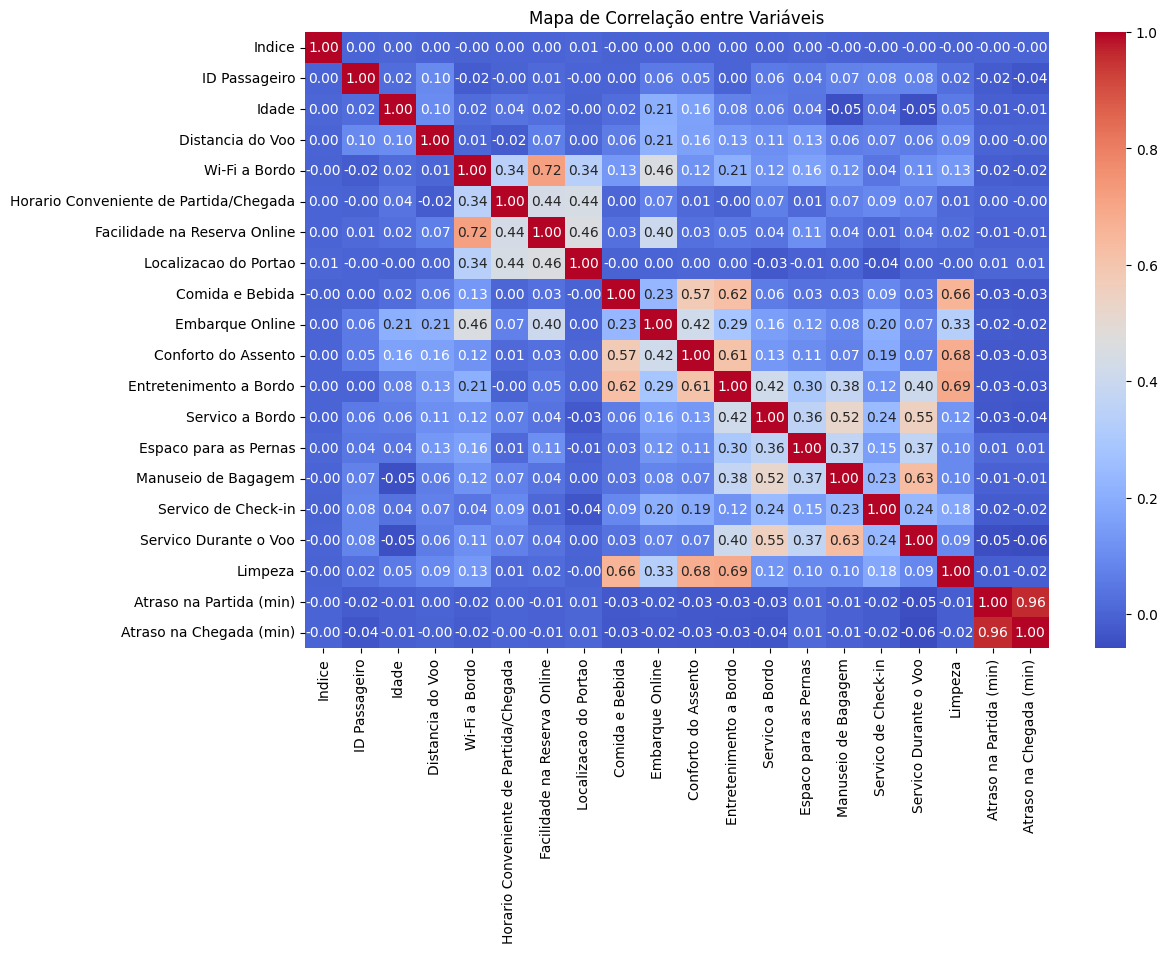

In [ ]:
# Correla√ß√£o entre as vari√°veis num√©ricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de Correla√ß√£o entre Vari√°veis")
plt.show()

### **OBS sobre o grafico de correlacao a cima**
::
**Correla√ß√£o alta entre:**

1.   Atraso na Partida (min) e Atraso na Chegada (min) -> 0.96 ===== *Interpretacao: atrasos na decolagem geralmente impactam a chegada.*


**Correla√ß√µes relevantes entre:**


1.   Servico Durante o Voo e Servico a Bordo -> 0.55 ===== ‚úÖ*Interpretacao: Existe uma correla√ß√£o significativa entre os servi√ßos gerais e o atendimento a bordo, o que sugere que a experi√™ncia global √© percebida como um conjunto coeso pelos passageiros.*
2.   Servico Durante o Voo e Entretenimento a Bordo -> 0.42 ===== ‚úÖ*Interpretacao: O entretenimento est√° positivamente associado √† percep√ß√£o do servi√ßo a bordo, com maior presen√ßa possivelmente em classes superiores. No entanto, como a correla√ß√£o √© moderada, trata-se de um diferencial percebido, n√£o um fator essencial.*
3.   Conforto do Assento e Espaco para as Pernas -> 0.36 ===== ‚úÖ*Interpretacao: O espa√ßo para as pernas contribui diretamente para a percep√ß√£o de conforto no assento, evidenciando a import√¢ncia de fatores ergon√¥micos para a satisfa√ß√£o do passageiro.*
4.   Conforto do Assento e Entretenimento a Bordo  -> 0.32 ===== ‚úÖ*Interpretacao: Apesar de o conforto estar mais associado a aspectos f√≠sicos, o entretenimento a bordo tamb√©m contribui positivamente para uma experi√™ncia mais agrad√°vel e menos mon√≥tona, complementando a sensa√ß√£o de bem-estar.*

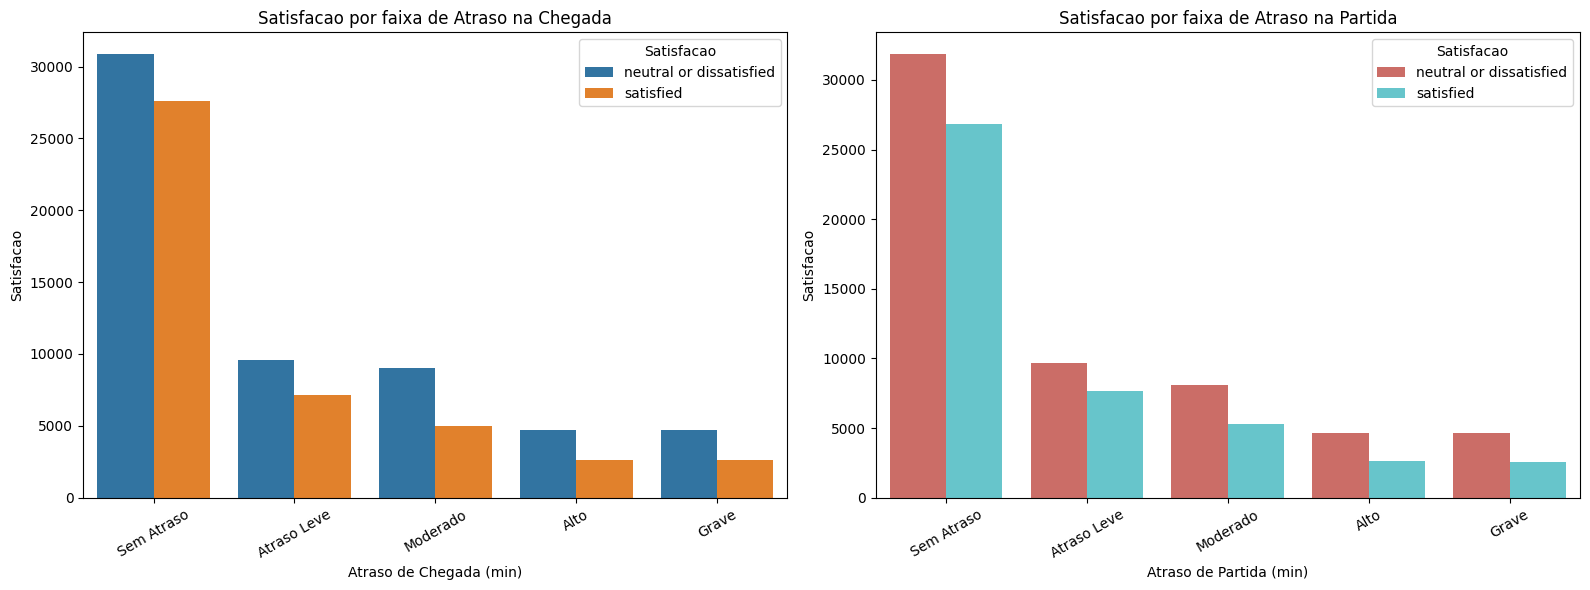

In [ ]:
df['Faixa_atraso_Chegada'] = pd.cut(
    df['Atraso na Chegada (min)'],
    bins = [-1, 0, 10, 30, 60, df['Atraso na Chegada (min)'].max()],
    labels = ['Sem Atraso', 'Atraso Leve', 'Moderado', 'Alto', 'Grave']
)

df['Faixa_atraso_Partida'] = pd.cut(
    df['Atraso na Partida (min)'],
    bins = [-1, 0, 10, 30, 60, df['Atraso na Partida (min)'].max()],
    labels = ['Sem Atraso', 'Atraso Leve', 'Moderado', 'Alto', 'Grave']
)



fig, axes = plt.subplots(1, 2, figsize = (16, 6), sharex = True)

sns.countplot(data = df, x = 'Faixa_atraso_Chegada', hue = 'Satisfacao',
              ax = axes[0], palette = 'tab10')

sns.countplot(data = df, x = 'Faixa_atraso_Partida', hue = 'Satisfacao',
              ax = axes[1], palette = 'hls')


axes[0].set_title('Satisfacao por faixa de Atraso na Chegada')
axes[0].set_xlabel('Atraso de Chegada (min)')
axes[0].set_ylabel('Satisfacao')
axes[0].tick_params(axis = 'x', rotation = 30)

axes[1].set_title('Satisfacao por faixa de Atraso na Partida')
axes[1].set_xlabel('Atraso de Partida (min)')
axes[1].set_ylabel('Satisfacao')
axes[1].tick_params(axis = 'x', rotation = 30)

plt.tight_layout()
plt.show()

Conforme e mostrado nos graficos a cima, o Nivel de satisfacao entre o atraso da chegada e da partida, estao bem similares. Um padrao percepitivel, e que mesmo sem atrasos no voo, ou com muito atraso, a maioria das pessoas se mantem neutra ou negativa em relacao a satisfacao.
Alguns pontos merecem destaque:
- "Sem Atraso" na Partida apresenta uma taxa de insatisfa√ß√£o ligeiramente superior √†quela observada na Chegada. Isso pode ser atribu√≠do a fatores externos √† pontualidade, como desconforto nos assentos, atendimento insatisfat√≥rio ainda em solo ou at√© mesmo quest√µes pessoais dos passageiros, que j√° iniciam a viagem com predisposi√ß√£o negativa.

- A faixa "Atraso Leve" na Chegada tamb√©m apresenta uma leve eleva√ß√£o na insatisfa√ß√£o em compara√ß√£o √† Partida. Tal percep√ß√£o pode estar relacionada √† experi√™ncia a bordo n√£o corresponder √†s expectativas durante o voo, o que refor√ßa a import√¢ncia da qualidade do servi√ßo durante o trajeto.

- A faixa "Moderado" (entre 10 e 30 min) apresenta uma diferen√ßa visual clara entre satisfeitos e insatisfeitos mais acentuada no atraso da chegada. Isso indica que o momento da chegada impacta mais diretamente a percep√ß√£o do cliente, possivelmente por comprometer compromissos, conex√µes ou expectativas.

- Tanto no atraso "Alto" quanto "Grave" de ambas as situacoes, apresentam uma grande similariedade entre os dados de satisfacao. Isso possivelmente se da pois independente da situacao, apos muito tempo, como 1 hora, a grande maioria ja nao tem paciencia para continuar a viagem.

- Em ambas as situa√ß√µes, as faixas de "Atraso Alto" e "Atraso Grave" apresentam comportamento semelhante em termos de distribui√ß√£o de satisfa√ß√£o. Isso refor√ßa a ideia de que, a partir de certo limite de atraso (acima de 60 minutos, por exemplo), a toler√¢ncia do passageiro se esgota, resultando em uma percep√ß√£o predominantemente negativa da experi√™ncia, independentemente do momento do voo.

----------------------------------------

**Ponto positivo a se destacar:** Um ponto positivo a ser ressaltado √© que, mesmo diante de atrasos classificados como "Altos" ou "Graves", ainda √© poss√≠vel observar uma parcela de passageiros que se declara satisfeita. Esse comportamento, embora minorit√°rio, pode indicar que a empresa conseguiu mitigar parcialmente os efeitos negativos do atraso, oferecendo uma experi√™ncia compensat√≥ria ‚Äî como conforto elevado, atendimento personalizado ou suporte diferenciado.

√â razo√°vel supor que essa fatia de passageiros satisfeitos esteja, em sua maioria, associada a classes superiores de servi√ßo, como a Primeira Classe ou Classe Executiva, onde os impactos do atraso s√£o minimizados por benef√≠cios como assentos mais confort√°veis, servi√ßos exclusivos e suporte priorit√°rio. Isso refor√ßa a ideia de que, em situa√ß√µes adversas, a qualidade do atendimento pode desempenhar um papel crucial na manuten√ß√£o da percep√ß√£o positiva por parte do cliente.

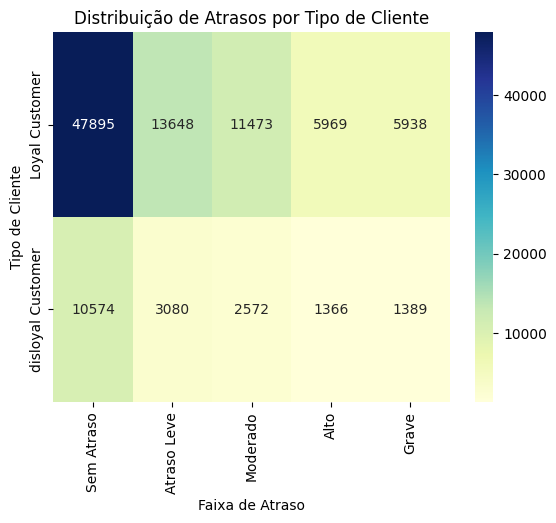

In [ ]:
heatmap_data = pd.crosstab(df['Tipo de Cliente'], df['Faixa_atraso_Chegada'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribui√ß√£o de Atrasos por Tipo de Cliente')
plt.xlabel('Faixa de Atraso')
plt.ylabel('Tipo de Cliente')
plt.show()

**Loyal Customer = Cliente fiel**

**Disloyal Customer = Cliente desleal**

Este grafico consegue nos trazer 2 informacoes importantes:
- A maioria dos passageiros registrados s√£o classificados como ‚ÄúLoyal Customers‚Äù (Clientes Fi√©is). Isso indica que a base da companhia a√©rea √© composta, em grande parte, por passageiros recorrentes, o que pode estar relacionado a programas de fidelidade, frequ√™ncia de viagens a trabalho ou prefer√™ncia consolidada pela companhia.

- O gr√°fico tamb√©m evidencia uma discrep√¢ncia significativa entre o volume de voos sem atraso e os voos com atraso, para ambos os perfis de cliente. Nota-se que a categoria ‚ÄúSem Atraso‚Äù concentra o maior n√∫mero absoluto de registros, enquanto as faixas "Alto" e "Grave" apresentam frequ√™ncia consideravelmente menor. Essa distribui√ß√£o refor√ßa o padr√£o j√° observado em an√°lises anteriores: a maioria dos voos ocorre dentro do hor√°rio previsto, embora as situa√ß√µes de atraso ‚Äî mesmo em menor volume ‚Äî apresentem maior impacto na satisfa√ß√£o do passageiro.

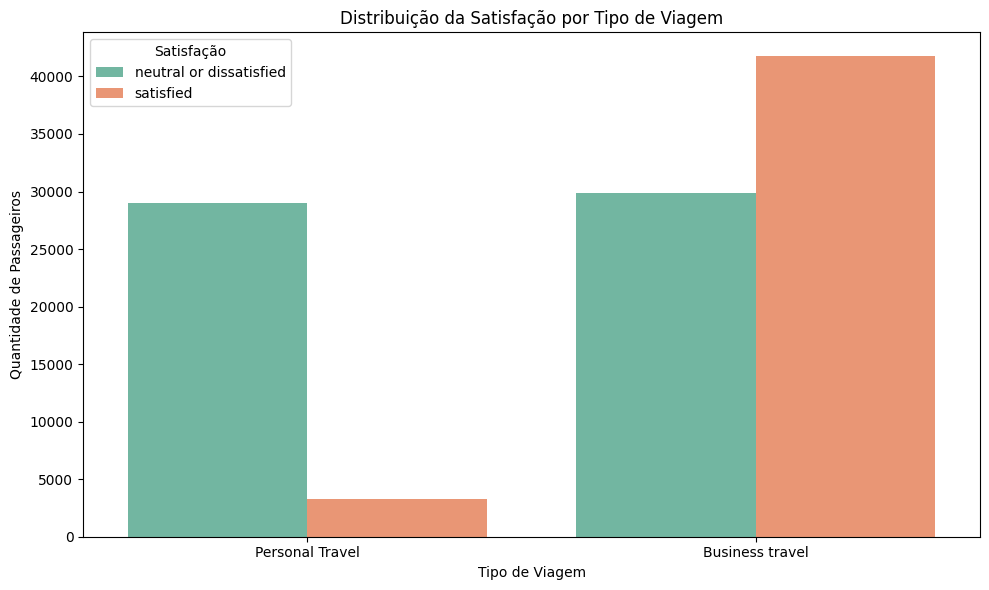

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Tipo de Viagem', hue = 'Satisfacao', palette = 'Set2')
plt.title('Distribui√ß√£o da Satisfa√ß√£o por Tipo de Viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Satisfa√ß√£o')
plt.tight_layout()
plt.show()

O gr√°fico revela uma tend√™ncia clara: passageiros que viajam a neg√≥cios (Business) apresentam n√≠veis significativamente mais altos de satisfa√ß√£o, quando comparados aos que viajam por motivos pessoais.

Essa diferen√ßa pode ser atribu√≠da a diversos fatores, como:

Maior frequ√™ncia de passageiros de classe executiva em viagens de neg√≥cios,

Benef√≠cios associados a programas corporativos,

Atendimento diferenciado a esse perfil de cliente.

Em contrapartida, passageiros que realizam viagens de car√°ter pessoal (Personal) concentram a maior parte dos registros neutros ou insatisfeitos. Esse comportamento pode indicar dificuldades operacionais, aus√™ncia de benef√≠cios adicionais ou expectativa n√£o atendida por parte desse p√∫blico.

Esse contraste refor√ßa a hip√≥tese de que o tratamento e os servi√ßos ofertados durante o voo variam conforme o perfil e o prop√≥sito da viagem, impactando diretamente a percep√ß√£o final da experi√™ncia a√©rea.

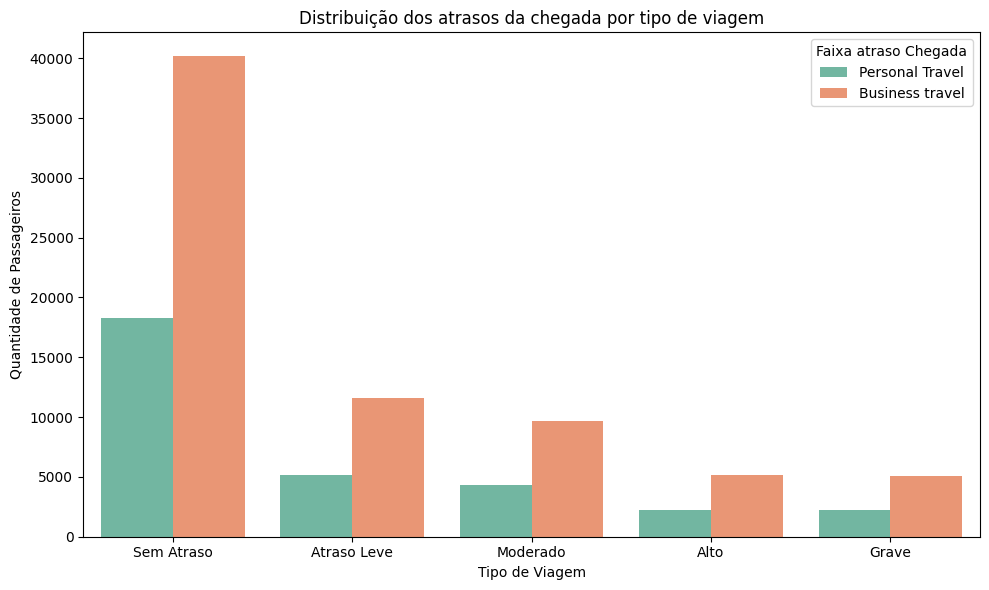

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Faixa_atraso_Chegada', hue = 'Tipo de Viagem', palette = 'Set2')
plt.title('Distribui√ß√£o dos atrasos da chegada por tipo de viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Faixa atraso Chegada')
plt.tight_layout()
plt.show()

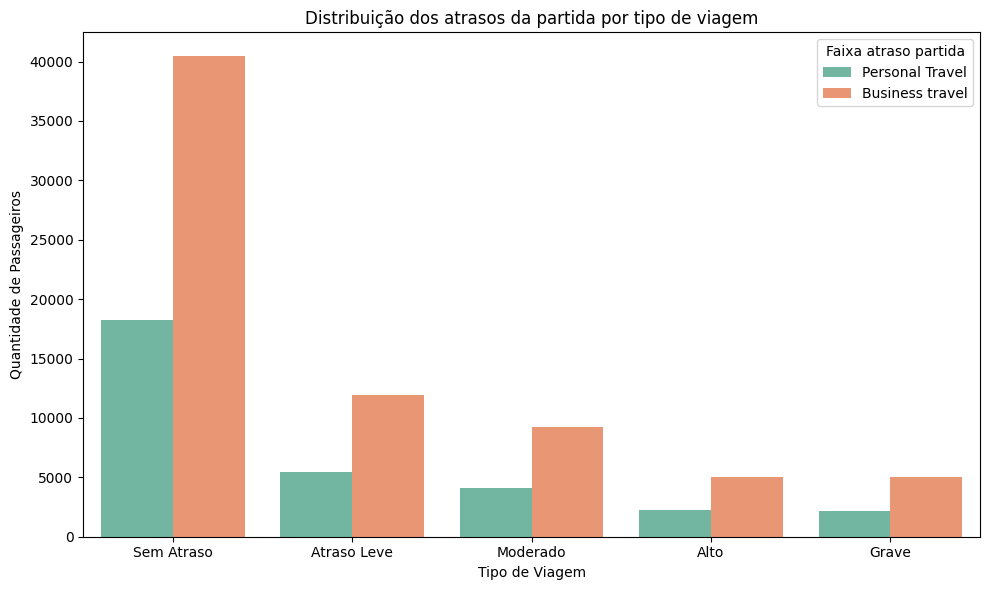

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Faixa_atraso_Partida', hue = 'Tipo de Viagem', palette = 'Set2')
plt.title('Distribui√ß√£o dos atrasos da partida por tipo de viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Faixa atraso partida')
plt.tight_layout()
plt.show()

De acodo com os 2 ultimos graficos apresentados, temo que:
- "Sem Atraso" lidera em ambas as categorias:
A faixa "Sem Atraso" apresenta a maior quantidade de passageiros tanto para viagens de neg√≥cios quanto pessoais, indicando que a maioria dos voos ocorre dentro do hor√°rio planejado, independentemente do tipo de viagem.

- Passageiros pessoais s√£o mais impactados por atrasos moderados a graves:
Embora em menor volume total, a propor√ß√£o de passageiros de viagens pessoais aumenta nas faixas de atraso mais elevadas. Isso pode indicar que clientes de voos pessoais s√£o mais expostos a voos com atraso, possivelmente por voarem em hor√°rios ou rotas com menos prioridade operacional.

- Assim como ja foi citado: A maioria das observa√ß√µes em todas as faixas de atraso pertence ao tipo de viagem Business, o que refor√ßa o perfil corporativo predominante da base de clientes da companhia a√©rea.

Text(0, 0.5, 'Quantidade de Passageiros')

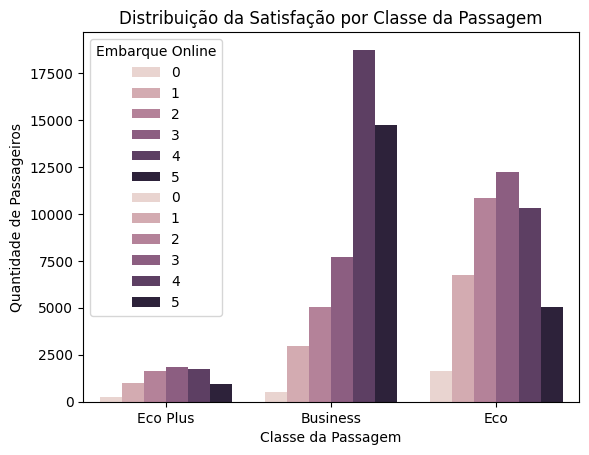

In [ ]:
sns.countplot(data=df, x= "Classe da Passagem", hue='Embarque Online')
plt.title('Distribuicao de qualificacao sobre o Embarque Online por Classe da Passagem')
plt.xlabel('Classe da Passagem')
plt.ylabel('Quantidade de Passageiros')

sns.countplot(data=df, x= "Classe da Passagem", hue='Embarque Online')
plt.title('Distribui√ß√£o da Satisfa√ß√£o por Classe da Passagem')
plt.xlabel('Classe da Passagem')
plt.ylabel('Quantidade de Passageiros')

Com base no √∫ltimo gr√°fico, √© percept√≠vel que todas as classes de passagem demonstram um alto n√≠vel de satisfa√ß√£o com o processo de compra de ingressos pela internet. Esse comportamento indica que o canal digital est√° funcionando de forma eficiente e atende bem √†s expectativas dos passageiros.

Por outro lado, essa avalia√ß√£o positiva refor√ßa a necessidade de aten√ß√£o especial aos pontos f√≠sicos de atendimento. Caso alguns passageiros ainda precisem utilizar o local para efetuar a compra presencialmente, √© poss√≠vel que estejam enfrentando dificuldades operacionais ou desconforto no ambiente f√≠sico, o que pode impactar negativamente a experi√™ncia geral da viagem.

Nesse contexto, torna-se estrat√©gico investir na melhoria das condi√ß√µes e da usabilidade dos pontos presenciais de venda, ou mesmo estimular ainda mais o uso da plataforma online, que j√° se mostra bem avaliada entre todos os perfis de clientes.

## ‚úÖ **Conclus√£o Geral da An√°lise Gr√°fica e Relacional**

A an√°lise explorat√≥ria e gr√°fica dos dados permitiu identificar **rela√ß√µes significativas entre vari√°veis operacionais, comportamentais e de experi√™ncia**, que impactam diretamente a **satisfa√ß√£o dos passageiros**. Os principais pontos observados s√£o:

---

### ‚úàÔ∏è **1. Atrasos s√£o determinantes para a insatisfa√ß√£o, mas n√£o isoladamente**

* A forte correla√ß√£o entre **atraso na partida e na chegada (r = 0.96)** confirma que atrasos na decolagem comprometem o cumprimento do cronograma do voo.
* No entanto, mesmo entre passageiros que n√£o enfrentaram atrasos, h√° um volume expressivo de avalia√ß√µes **neutras ou negativas**, o que evidencia que **a pontualidade, embora fundamental, n√£o √© suficiente** para garantir a satisfa√ß√£o.

---

### üë• **2. Perfil do passageiro influencia diretamente a percep√ß√£o da experi√™ncia**

* Passageiros de **viagens a neg√≥cios** demonstram **n√≠veis mais altos de satisfa√ß√£o**, o que pode estar associado a **benef√≠cios operacionais, servi√ßos premium e menor toler√¢ncia a falhas**.
* J√° os passageiros em **viagens pessoais** concentram a maior parte das avalia√ß√µes negativas, sendo mais afetados por atrasos **moderados e graves**, possivelmente por viajarem em rotas de menor prioridade operacional.

---

### üõ´ **3. Atrasos graves afetam a percep√ß√£o de forma homog√™nea**

* Nas faixas de atraso **acima de 60 minutos**, a **satisfa√ß√£o cai drasticamente em ambos os contextos (chegada e partida)**. Esse padr√£o sugere que **h√° um limite de toler√¢ncia do passageiro**, ultrapassado o qual a experi√™ncia torna-se predominantemente negativa.
* Ainda assim, observa-se uma **minoria satisfeita mesmo em contextos cr√≠ticos**, o que pode ser atribu√≠do a **benef√≠cios oferecidos em classes superiores**, como conforto, prioridade e atendimento diferenciado.

---

### üéß **4. Qualidade dos servi√ßos a bordo impacta a satisfa√ß√£o**

* A correla√ß√£o entre **‚ÄúServi√ßo Durante o Voo‚Äù e ‚ÄúServi√ßo a Bordo‚Äù (r = 0.55)** evidencia que os passageiros percebem a experi√™ncia como um **conjunto integrado**, em que atendimento e servi√ßos est√£o diretamente interligados.
* Itens como **conforto do assento**, **entretenimento** e **espa√ßo para as pernas** apresentam correla√ß√£o moderada com a satisfa√ß√£o, indicando que, embora n√£o sejam determinantes isolados, **refor√ßam a experi√™ncia positiva** durante o voo.

---

### üßæ **5. A experi√™ncia digital de compra √© bem avaliada, mas o atendimento f√≠sico exige aten√ß√£o**

* A avalia√ß√£o positiva do **embarque online** por todas as classes de passagem demonstra que o canal digital atende de forma eficaz √†s expectativas do p√∫blico.
* No entanto, essa aprova√ß√£o acende um alerta sobre os **pontos f√≠sicos de atendimento**, onde passageiros que n√£o utilizam o canal digital podem estar sendo expostos a **situa√ß√µes de desconforto**, comprometendo sua jornada.

---

### üìä **6. Composi√ß√£o da base: clientes fi√©is e voos pontuais predominam**

* A base da companhia a√©rea √© majoritariamente composta por **clientes fi√©is (‚ÄúLoyal Customers‚Äù)**, o que demonstra sucesso em programas de fideliza√ß√£o.
* A maioria dos voos ocorre **sem atrasos**, mas os eventos de atraso, mesmo em menor volume, representam **os principais pontos de frustra√ß√£o na jornada**.

---

## üß† **S√≠ntese estrat√©gica**

> A satisfa√ß√£o do passageiro √© resultado de m√∫ltiplos fatores interdependentes. Embora a pontualidade e o conforto sejam pilares centrais, a experi√™ncia √© amplificada (positiva ou negativamente) por aspectos como atendimento, perfil do cliente e canais de intera√ß√£o com a companhia. Investir em **personaliza√ß√£o do servi√ßo**, **aten√ß√£o ao p√∫blico de viagens pessoais**, e **qualidade consistente em todos os pontos de contato** s√£o caminhos estrat√©gicos para elevar a percep√ß√£o geral da experi√™ncia a√©rea.

## **Modelagem com Aprendizado de M√°quina**

In [ ]:
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()

# Remover colunas irrelevantes
df.drop(['ID Passageiro', 'Indice'], axis=1, inplace=True)

# Tratar valores nulos
df.dropna(inplace=True)

# Codificar vari√°veis categ√≥ricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Separar vari√°veis preditoras e alvo
X = df.drop('Satisfacao', axis=1)
y = df['Satisfacao']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Indice                                  103904 non-null  int64   
 1   ID Passageiro                           103904 non-null  int64   
 2   Genero                                  103904 non-null  object  
 3   Tipo de Cliente                         103904 non-null  object  
 4   Idade                                   103904 non-null  int64   
 5   Tipo de Viagem                          103904 non-null  object  
 6   Classe da Passagem                      103904 non-null  object  
 7   Distancia do Voo                        103904 non-null  int64   
 8   Wi-Fi a Bordo                           103904 non-null  int64   
 9   Horario Conveniente de Partida/Chegada  103904 non-null  int64   
 10  Facilidade na Reserva Online    

In [ ]:
# Copia o dataframe original
df_ml = df.copy()

# Remove colunas que n√£o s√£o √∫teis (se existirem)
for col in ['Unnamed: 0', 'Indice', 'ID Passageiro', 'id']:
    if col in df_ml.columns:
        df_ml.drop(col, axis=1, inplace=True)

# Remove linhas com valores nulos
df_ml.dropna(inplace=True)

# Aplica LabelEncoder em TODAS as colunas que t√™m strings
le = LabelEncoder()
for col in df_ml.columns:
    if df_ml[col].dtype == 'object':
        df_ml[col] = le.fit_transform(df_ml[col])

# Lista de colunas categ√≥ricas (vis√≠veis na imagem)
colunas_categoricas = ['Faixa_atraso_Chegada', 'Faixa_atraso_Partida']

le = LabelEncoder()
for col in colunas_categoricas:
    df_ml[col] = le.fit_transform(df_ml[col])



# Verifica se agora todas s√£o num√©ricas
print(df_ml.dtypes)

Genero                                      int64
Tipo de Cliente                             int64
Idade                                       int64
Tipo de Viagem                              int64
Classe da Passagem                          int64
Distancia do Voo                            int64
Wi-Fi a Bordo                               int64
Horario Conveniente de Partida/Chegada      int64
Facilidade na Reserva Online                int64
Localizacao do Portao                       int64
Comida e Bebida                             int64
Embarque Online                             int64
Conforto do Assento                         int64
Entretenimento a Bordo                      int64
Servico a Bordo                             int64
Espaco para as Pernas                       int64
Manuseio de Bagagem                         int64
Servico de Check-in                         int64
Servico Durante o Voo                       int64
Limpeza                                     int64


In [ ]:
# Separar preditores e alvo
X = df_ml.drop('Satisfacao', axis=1)
y = df_ml['Satisfacao']

# Separar treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # agora deve funcionar sem erro!

# Previs√£o
y_pred = model.predict(X_test)

# Avalia√ß√£o
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acur√°cia:", accuracy_score(y_test, y_pred))

[[17178   377]
 [  838 12779]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.95     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

Acur√°cia: 0.9610227126908765


### **Visualizacao do modelo Random Forest**

**Matriz de Confus√£o com heatmap**

√â a forma mais comum para ver onde o modelo acertou e errou.

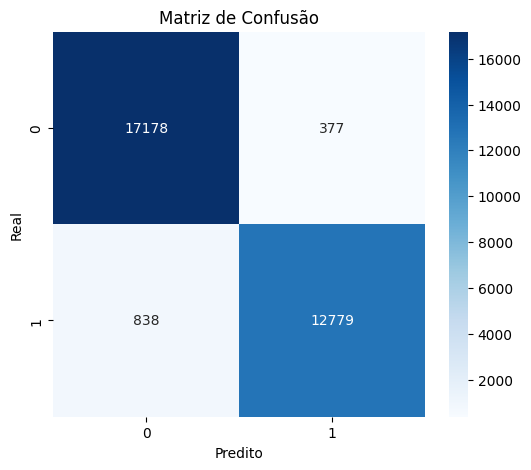

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confus√£o')
plt.show()

De acordo com o gr√°fico da matriz de confus√£o, o modelo apresentou um excelente desempenho na tarefa de classifica√ß√£o. Podemos observar que:

Foram corretamente classificados aproximadamente 17 mil exemplos da classe 0 (valores na c√©lula [0,0] ‚Äî canto superior esquerdo).

Foram corretamente classificados aproximadamente 12 mil exemplos da classe 1 (valores na c√©lula [1,1] ‚Äî canto inferior direito).

Isso indica que o modelo aprendeu bem a distinguir entre as duas classes, com a maior parte das previs√µes concentradas na diagonal principal da matriz, que representa as classifica√ß√µes corretas.

As c√©lulas fora da diagonal (erros de classifica√ß√£o) apresentaram valores significativamente menores, o que refor√ßa a efic√°cia do modelo. Portanto, o gr√°fico da matriz de confus√£o evidencia que o modelo tem alta acur√°cia e baixo √≠ndice de erro, tanto para a classe 0 quanto para a classe 1.

**Import√¢ncia das features (vari√°veis preditoras)**

Visualize quais vari√°veis seu Random Forest considerou mais importantes para a predi√ß√£o.

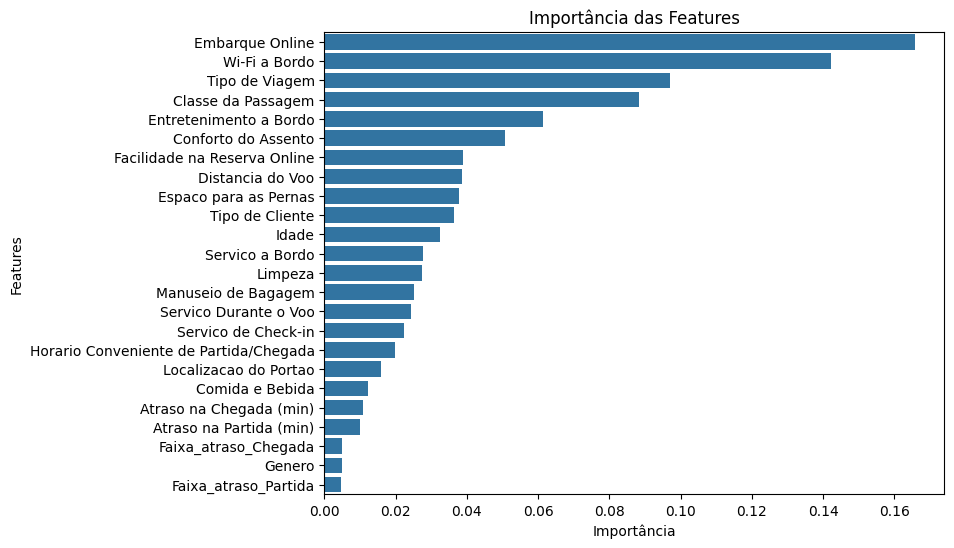

In [ ]:
importances = model.feature_importances_
features = X.columns

# Ordenar import√¢ncias
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Import√¢ncia das Features')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.show()

De acordo com o grafico, temos que:

"Embarque Online" foi a vari√°vel mais importante, indicando forte influ√™ncia da experi√™ncia digital na satisfa√ß√£o do cliente.

Outras vari√°veis relevantes: "Wi-Fi a Bordo", "Tipo de Viagem", "Classe da Passagem" e "Entretenimento a Bordo".

Vari√°veis como "G√™nero", "Faixas de Atraso" e "Comida e Bebida" tiveram pouca ou nenhuma relev√¢ncia.

O modelo mostra que fatores ligados √† jornada digital e conforto explicam melhor a satisfa√ß√£o do que fatores operacionais ou pessoais.

**Curva ROC (para classifica√ß√£o bin√°ria)**

Visualizar a curva ROC para analisar o desempenho do modelo de forma binaria.

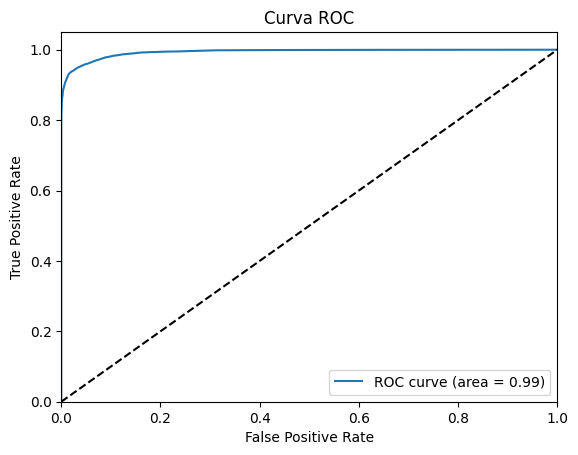

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Se o target tiver duas classes:
if len(y.unique()) == 2:
    y_test_bin = label_binarize(y_test, classes=[y.unique()[0], y.unique()[1]])
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # linha diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

Com esta visualizacao, percebemos que:

- A curva est√° bem pr√≥xima do canto superior esquerdo, o que indica alta taxa de verdadeiros positivos com baixa taxa de falsos positivos ‚Äî ou seja, um √≥timo desempenho.

- A AUC (√Årea sob a Curva) foi de 0.99, muito pr√≥xima de 1. Isso significa que o modelo tem excelente capacidade de distinguir entre as classes.